In [1]:
import re
import nltk
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ahmedmansour/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmedmansour/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahmedmansour/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ahmedmansour/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
spam_data = pd.read_csv('./spam.csv', encoding='ISO-8859-1')
spam_data = spam_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
spam_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
spam_data = spam_data.replace(['ham', 'spam'], [0, 1])
spam_data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [4]:
spam_data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
spam_data['v1'].value_counts()

0    4825
1     747
Name: v1, dtype: int64

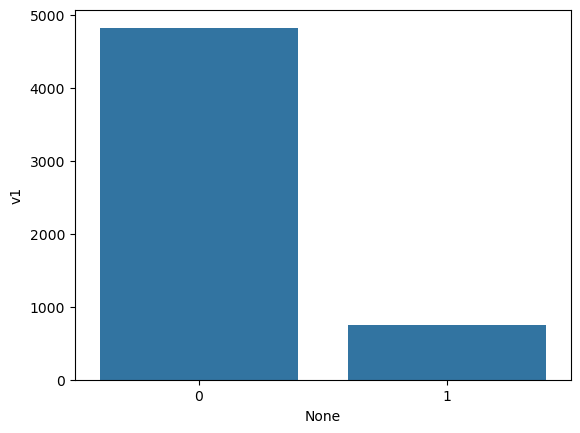

In [7]:
sns.barplot(x=spam_data['v1'].value_counts().index, y=spam_data['v1'].value_counts())
plt.show()

In [8]:
ps = PorterStemmer()
lem = WordNetLemmatizer()


In [9]:
def modify_data(data):
    data = re.sub(r'[^w\d\s]', ' ', data)
    data = data.lower()
    data = word_tokenize(data)
    data = [ps.stem(word) for word in data if not word in set(stopwords.words('english'))]
    data = [lem.lemmatize(word) for word in data if not word in set(stopwords.words('english'))]
    data = ' '.join(data)
    return data

spam_data['v2'] = spam_data['v2'].apply(modify_data)
spam_data

,v1,v2
0,0,w w
1,0,w
2,1,2 w w 21 2005 87121 08452810075 18
3,0,
4,0,
...,...,...
5567,1,2 w 2 w 750 2 087187272008 1 10
5568,0,
5569,0,w
5570,0,w


In [10]:
cv = CountVectorizer()
X = cv.fit_transform(spam_data['v2']).toarray()
X.shape

(5572, 665)

In [11]:
y = spam_data['v1']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [13]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
score = logistic.score(X_test, y_test)
predictions = logistic.predict(X_test)
print(f"Logistic model accuracy = {score:0.1%}")
print(classification_report(y_test, predictions))


Logistic model accuracy = 94.7%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1587
           1       0.97      0.63      0.77       252

    accuracy                           0.95      1839
   macro avg       0.96      0.82      0.87      1839
weighted avg       0.95      0.95      0.94      1839



In [14]:
svm = SVC()
svm.fit(X_train, y_train)
score = svm.score(X_test, y_test)
predictions = svm.predict(X_test)
print(f"Sypport vector machinces model accuracy = {score:0.1%}")
print(classification_report(y_test, predictions))

Sypport vector machinces model accuracy = 98.0%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1587
           1       0.93      0.92      0.93       252

    accuracy                           0.98      1839
   macro avg       0.96      0.96      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [15]:
naive = GaussianNB()
naive.fit(X_train, y_train)
score = naive.score(X_test, y_test)
predictions = naive.predict(X_test)
print(f"Naive bayes model accuracy = {score:0.1%}")
print(classification_report(y_test, predictions))

Naive bayes model accuracy = 96.3%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1587
           1       0.98      0.74      0.85       252

    accuracy                           0.96      1839
   macro avg       0.97      0.87      0.91      1839
weighted avg       0.96      0.96      0.96      1839

